In [3]:
with open('DAresult0.txt', 'r') as file:

    data = file.read()
    print(data)
import pandas as pd

# Assuming the data is a string with newline characters separating rows and spaces separating columns
data_rows = data.split('\n')
data_matrix = [row.split() for row in data_rows if row]

# Assuming the first row contains the column names
column_names = data_matrix[0]
data_values = data_matrix[1:]

# Creating a DataFrame
df = pd.DataFrame(data_values, columns=column_names)


step	time	real_TrafficState	real_elapseTimeInGreen	real_westSideQueue	real_eastSideQueue	real_carPassingT	DA_eastMovingGreenPct	DA_eastGreenElapseTime	DA_westMovingGreenPct	DA_westGreenElapseTime	combinedElapseTime	aveWestSideQueue	westSideQsize_std	aveEastSideQueue	eastSideQsize_std	aveCarPassingT	carPassingT_std	real_lightSwitchTime_E2W	real_lightSwitchTime_W2E	pf_lightSwitchTime_E2W	pf_lightSwitchTime_W2E
0	0.0	0	24.600931738014765	1	0	5.0	3.2560000000000002	20.282315149738043	16.744	59.81780090712577	53.38142382582312	12.0692	6.33441483958859	8.5962	5.369799396625356	6.328867692598119	2.217954260189654	90.0	90.0	106.37882165325384	106.37882165325384
1	30.0	20	15.337169234355656	0	7	5.0	11.468	21.881669507479852	8.532	59.22815136963586	37.81367866987591	13.1296	6.959023195822613	13.7306	6.329741198500967	7.082477147061193	2.1751253016236154	90.0	90.0	85.71105266442416	85.71105266442416
2	60.0	0	25.50037441202306	4	5	5.0	8.612	14.891317351763549	11.388	65.4051506196026	43.65389401447

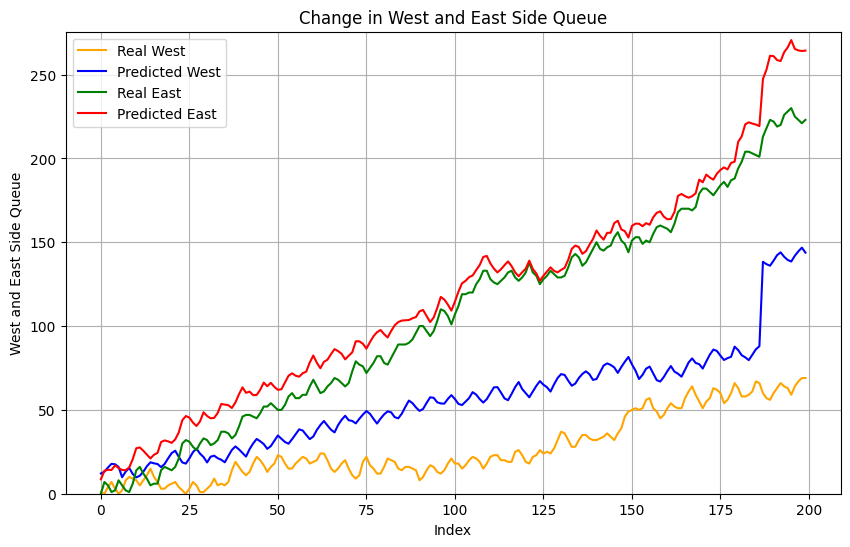

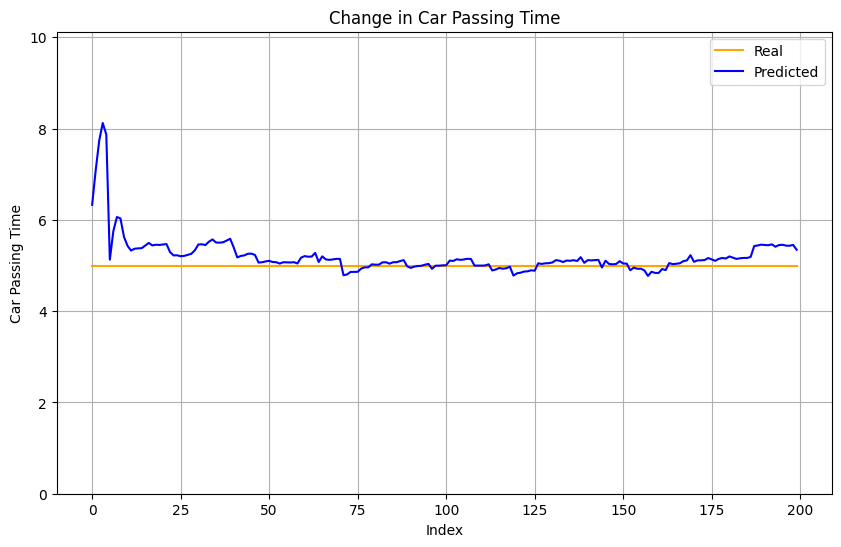

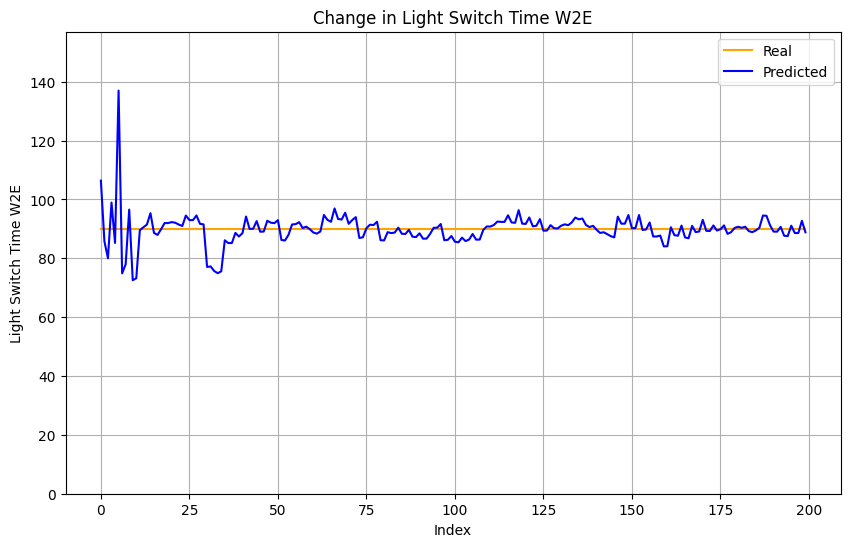

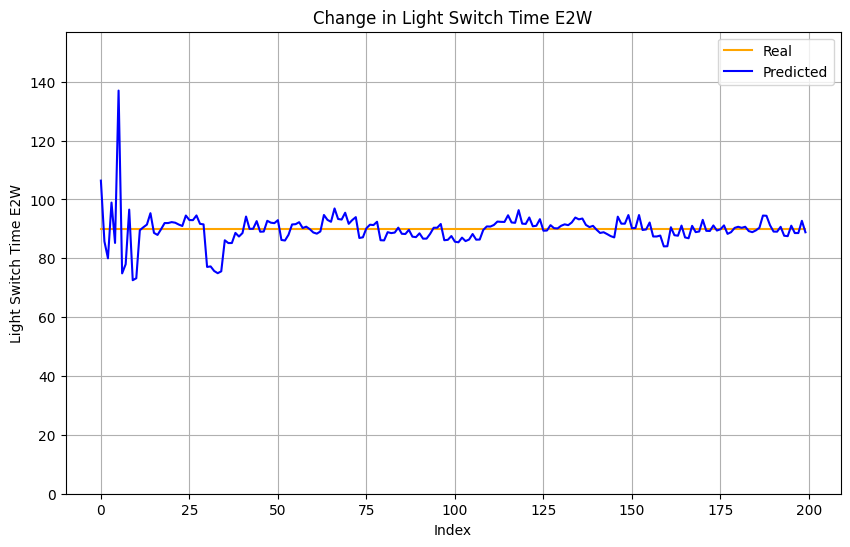

In [4]:

import matplotlib.pyplot as plt
# Assuming 'aveWestSideQueue' and 'real_westSideQueue' are columns in the DataFrame 'df'
# Convert the 'aveWestSideQueue' and 'real_westSideQueue' columns to numeric, errors='coerce' will convert non-numeric values to NaN
df['aveWestSideQueue'] = pd.to_numeric(df['aveWestSideQueue'], errors='coerce')
df['real_westSideQueue'] = pd.to_numeric(df['real_westSideQueue'], errors='coerce')

# Assuming 'aveEastSideQueue' and 'real_eastSideQueue' are columns in the DataFrame 'df'
# Convert the 'aveEastSideQueue' and 'real_eastSideQueue' columns to numeric, errors='coerce' will convert non-numeric values to NaN
df['aveEastSideQueue'] = pd.to_numeric(df['aveEastSideQueue'], errors='coerce')
df['real_eastSideQueue'] = pd.to_numeric(df['real_eastSideQueue'], errors='coerce')

# Drop rows with NaN values in 'aveWestSideQueue', 'real_westSideQueue', 'aveEastSideQueue', and 'real_eastSideQueue' columns
df_cleaned = df.dropna(subset=['aveWestSideQueue', 'real_westSideQueue', 'aveEastSideQueue', 'real_eastSideQueue'])

# Plotting
plt.figure(figsize=(10, 6))  # Size in inches: width by height
plt.plot(df_cleaned.index, df_cleaned['real_westSideQueue'], linestyle='-', color='orange', label='Real West')
plt.plot(df_cleaned.index, df_cleaned['aveWestSideQueue'], linestyle='-', color='b', label='Predicted West')
plt.plot(df_cleaned.index, df_cleaned['real_eastSideQueue'], linestyle='-', color='green', label='Real East')
plt.plot(df_cleaned.index, df_cleaned['aveEastSideQueue'], linestyle='-', color='red', label='Predicted East')

plt.title('Change in West and East Side Queue')
plt.xlabel('Index')
plt.ylabel('West and East Side Queue')
plt.legend()
plt.grid(True)
plt.ylim(0, df_cleaned[['real_westSideQueue', 'aveWestSideQueue', 'real_eastSideQueue', 'aveEastSideQueue']].max().max()+5) 
plt.show()


import matplotlib.pyplot as plt

# Assuming 'pf_carPassingT' and 'real_carPassingT' are columns in the DataFrame 'df'
# Convert the 'pf_carPassingT' and 'real_carPassingT' columns to numeric, errors='coerce' will convert non-numeric values to NaN
df['aveCarPassingT'] = pd.to_numeric(df['aveCarPassingT'], errors='coerce')
df['real_carPassingT'] = pd.to_numeric(df['real_carPassingT'], errors='coerce')

# Drop rows with NaN values in 'aveCarPassingT' and 'real_carPassingT' columns
df_cleaned = df.dropna(subset=['aveCarPassingT', 'real_carPassingT'])

# Plotting
plt.figure(figsize=(10, 6))  # Size in inches: width by height
plt.plot(df_cleaned.index, df_cleaned['real_carPassingT'], linestyle='-', color='orange', label='Real')
plt.plot(df_cleaned.index, df_cleaned['aveCarPassingT'], linestyle='-', color='b', label='Predicted')

plt.title('Change in Car Passing Time')
plt.xlabel('Index')
plt.ylabel('Car Passing Time')
plt.legend()
plt.grid(True)
plt.ylim(0, df_cleaned[['real_carPassingT', 'aveCarPassingT']].max().max()+2) 
plt.show()

import matplotlib.pyplot as plt

# Assuming 'pf_lightSwitchTime_W2E' and 'real_lightSwitchTime_W2E' are columns in the DataFrame 'df'
# Convert the 'pf_lightSwitchTime_W2E' and 'real_lightSwitchTime_W2E' columns to numeric, errors='coerce' will convert non-numeric values to NaN
df['pf_lightSwitchTime_W2E'] = pd.to_numeric(df['pf_lightSwitchTime_W2E'], errors='coerce')
df['real_lightSwitchTime_W2E'] = pd.to_numeric(df['real_lightSwitchTime_W2E'], errors='coerce')

# Drop rows with NaN values in 'pf_lightSwitchTime_W2E' and 'real_lightSwitchTime_W2E' columns
df_cleaned = df.dropna(subset=['pf_lightSwitchTime_W2E', 'real_lightSwitchTime_W2E'])

# Plotting
plt.figure(figsize=(10, 6))  # Size in inches: width by height
plt.plot(df_cleaned.index, df_cleaned['real_lightSwitchTime_W2E'], linestyle='-', color='orange', label='Real')
plt.plot(df_cleaned.index, df_cleaned['pf_lightSwitchTime_W2E'], linestyle='-', color='b', label='Predicted')

plt.title('Change in Light Switch Time W2E')
plt.xlabel('Index')
plt.ylabel('Light Switch Time W2E')
plt.legend()
plt.grid(True)
plt.ylim(0, df_cleaned[['real_lightSwitchTime_W2E', 'pf_lightSwitchTime_W2E']].max().max()+20) 
plt.show()


import matplotlib.pyplot as plt

# Assuming 'pf_lightSwitchTime_E2W' and 'real_lightSwitchTime_E2W' are columns in the DataFrame 'df'
# Convert the 'pf_lightSwitchTime_E2W' and 'real_lightSwitchTime_E2W' columns to numeric, errors='coerce' will convert non-numeric values to NaN
df['pf_lightSwitchTime_E2W'] = pd.to_numeric(df['pf_lightSwitchTime_E2W'], errors='coerce')
df['real_lightSwitchTime_E2W'] = pd.to_numeric(df['real_lightSwitchTime_E2W'], errors='coerce')

# Drop rows with NaN values in 'pf_lightSwitchTime_E2W' and 'real_lightSwitchTime_E2W' columns
df_cleaned = df.dropna(subset=['pf_lightSwitchTime_E2W', 'real_lightSwitchTime_E2W'])

# Plotting
plt.figure(figsize=(10, 6))  # Size in inches: width by height
plt.plot(df_cleaned.index, df_cleaned['real_lightSwitchTime_E2W'], linestyle='-', color='orange', label='Real')
plt.plot(df_cleaned.index, df_cleaned['pf_lightSwitchTime_E2W'], linestyle='-', color='b', label='Predicted')

plt.title('Change in Light Switch Time E2W')
plt.xlabel('Index')
plt.ylabel('Light Switch Time E2W')
plt.legend()
plt.grid(True)
plt.ylim(0, df_cleaned[['real_lightSwitchTime_E2W', 'pf_lightSwitchTime_E2W']].max().max()+20) 
plt.show()


